In [1]:
import pandas as pd
###########################
import re
###########################
from numpy import array
import numpy as np
###########################
import matplotlib.pyplot as plt
###########################
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
###########################
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data.csv')

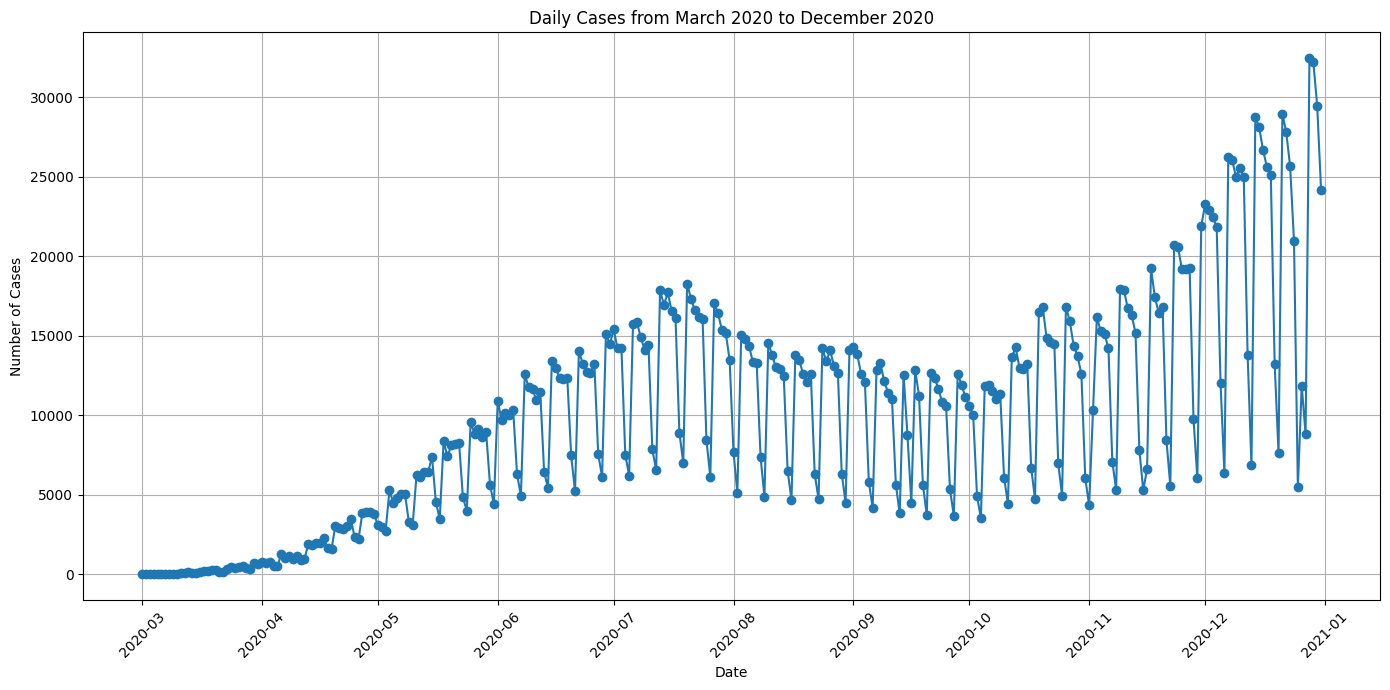

In [3]:
df_transposed = df.set_index(['cve_ent', 'poblacion', 'nombre']).T

df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'date'}, inplace=True)
df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

mask = (df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')
df_filtered = df_transposed.loc[mask]

df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
df_daily = df_filtered_numeric.sum(axis=1)

plt.figure(figsize=(14, 7))
plt.plot(df_filtered['date'], df_daily, marker='o', linestyle='-')
plt.title('Daily Cases from March 2020 to December 2020')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [4]:
estados_a_filtrar = ["Nacional", "DISTRITO FEDERAL", "GUANAJUATO", "JALISCO", "MORELOS", "PUEBLA", "QUERETARO"]
df_filtrado = df[df['nombre'].isin(estados_a_filtrar)]
df_filtrado.fillna(method='ffill', inplace=True)

/var/folders/73/m50h3qv91_n45vnh3sfw1pb00000gq/T/ipykernel_26505/340870129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.fillna(method='ffill', inplace=True)


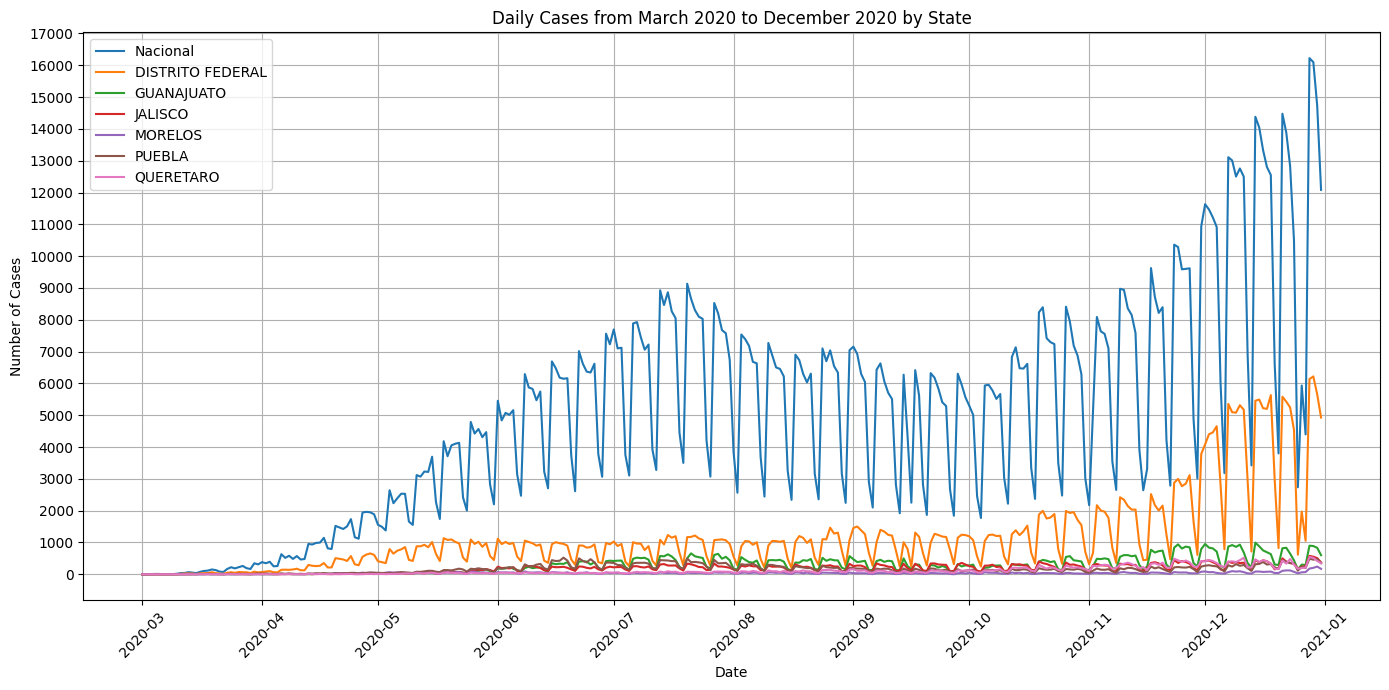

In [5]:
plt.figure(figsize=(14, 7))

max_cases = 0

for estado in estados_a_filtrar:
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    if df_daily.max() > max_cases:
        max_cases = df_daily.max()

    plt.plot(df_filtered['date'], df_daily, linestyle='-', label=estado)

plt.yticks(range(0, int(max_cases) + 1000, 1000))

plt.title('Daily Cases from March 2020 to December 2020 by State')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

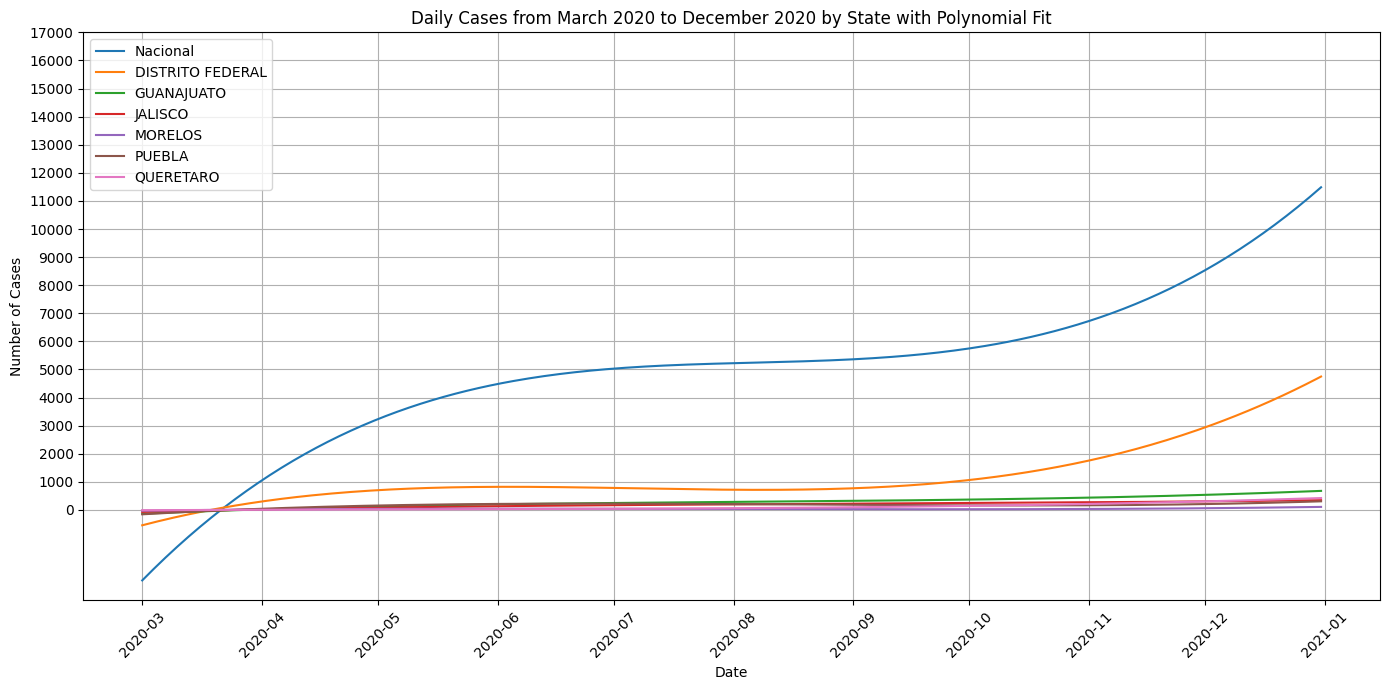

In [6]:
plt.figure(figsize=(14, 7))

max_cases = 0

for estado in estados_a_filtrar:
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    if df_daily.max() > max_cases:
        max_cases = df_daily.max()

    x = np.arange(len(df_daily))
    y = df_daily.values
    p = np.polyfit(x, y, 3)
    poly = np.poly1d(p)

    plt.plot(df_filtered['date'], poly(x), linestyle='-', label=f'{estado}')

plt.yticks(range(0, int(max_cases) + 1000, 1000))

plt.title('Daily Cases from March 2020 to December 2020 by State with Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

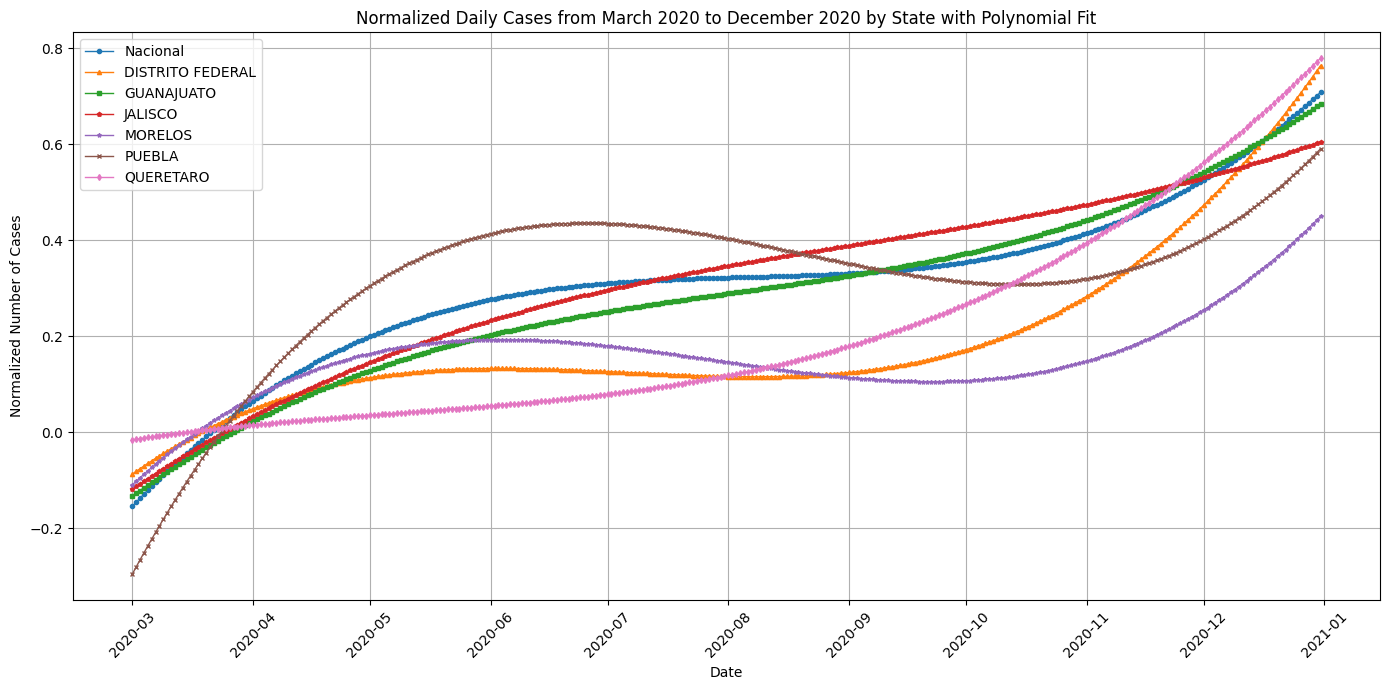

In [7]:
plt.figure(figsize=(14, 7))

markers = ['o', '^', 's', 'p', '*', 'x', 'd']

for estado, marker in zip(estados_a_filtrar, markers):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T

    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    scaler = MinMaxScaler()
    df_daily_normalized = scaler.fit_transform(df_daily.values.reshape(-1, 1)).flatten()

    x = np.arange(len(df_daily_normalized))
    p = np.polyfit(x, df_daily_normalized, 3)
    poly = np.poly1d(p)

    plt.plot(df_filtered['date'], poly(x), linestyle='-', marker=marker, markersize=3, linewidth=1, label=f'{estado}')

plt.title('Normalized Daily Cases from March 2020 to December 2020 by State with Polynomial Fit')
plt.xlabel('Date')
plt.ylabel('Normalized Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

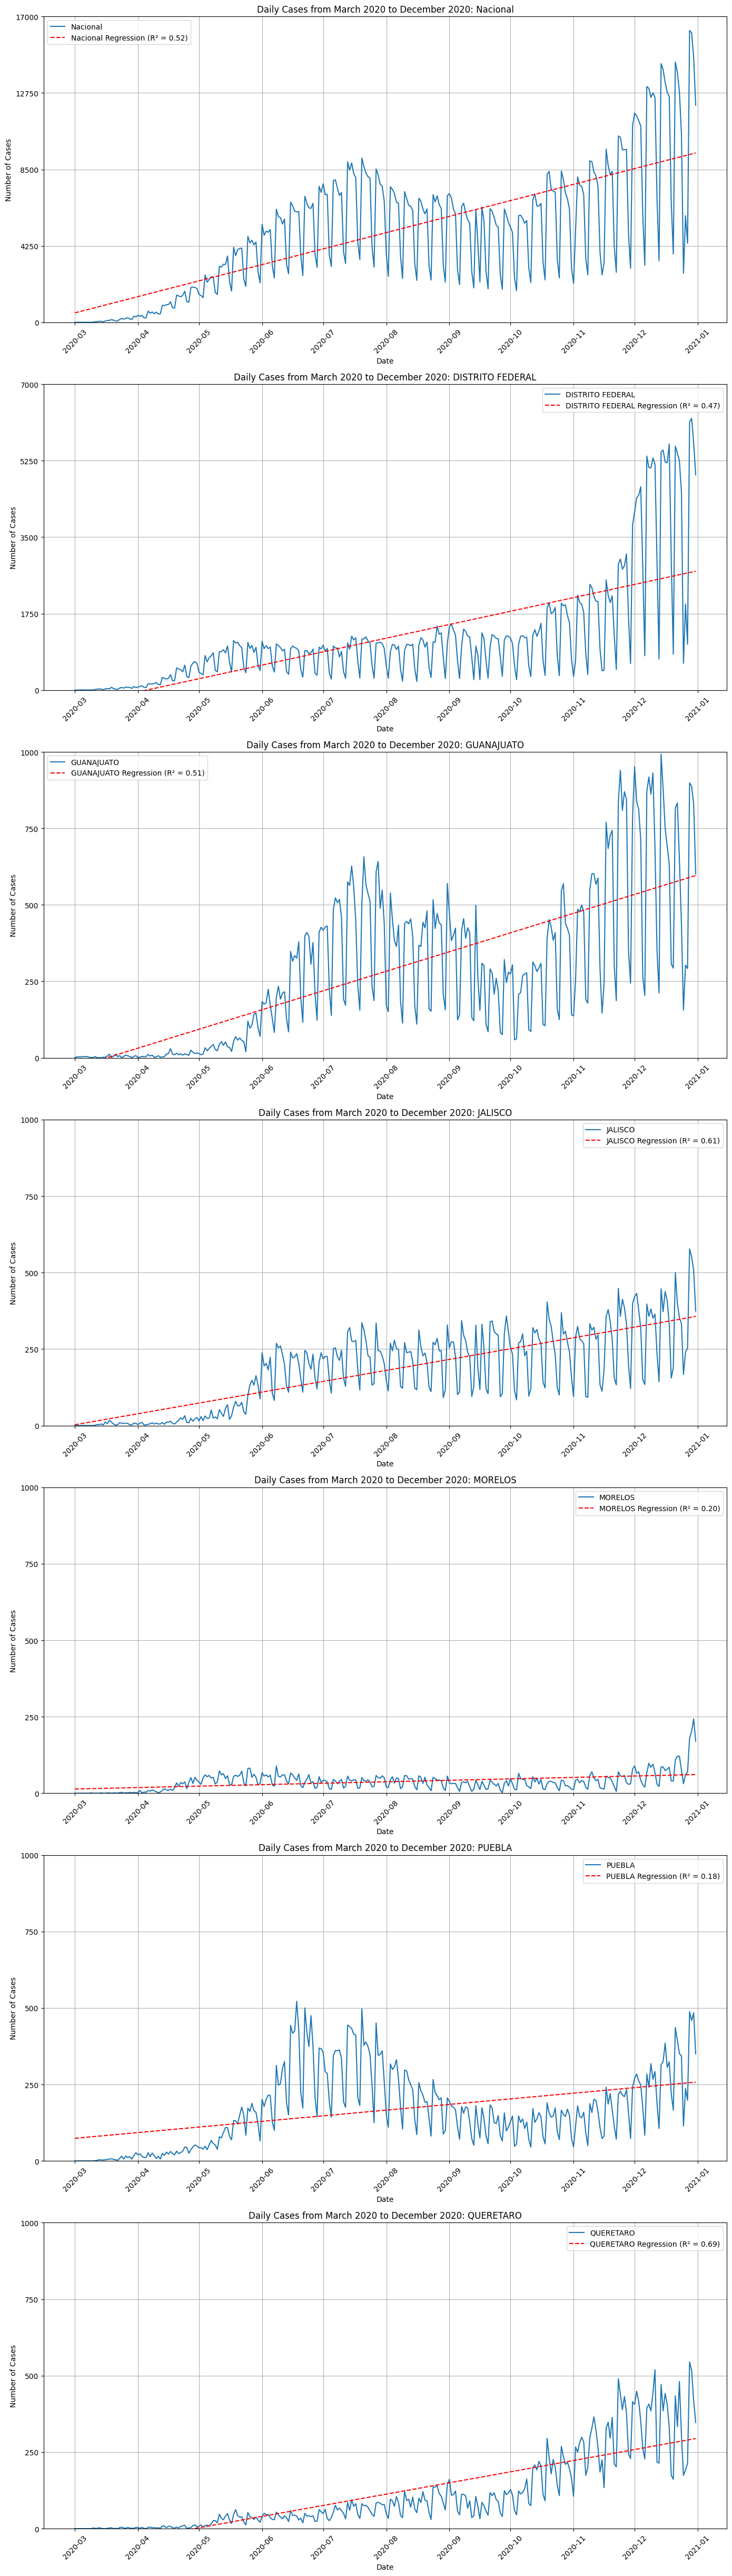

In [8]:
fig, axes = plt.subplots(len(estados_a_filtrar), 1, figsize=(14, 7 * len(estados_a_filtrar)))

if len(estados_a_filtrar) == 1:
    axes = [axes]
for ax, estado in zip(axes, estados_a_filtrar):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]
    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    x = np.array(range(len(df_daily))).reshape(-1, 1)
    y = df_daily.values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    r_squared = r2_score(y, y_pred)

    ax.plot(df_filtered['date'], df_daily, linestyle='-', label=f'{estado}')
    ax.plot(df_filtered['date'], y_pred, linestyle='--', color='red', label=f'{estado} Regression (R² = {r_squared:.2f})')
    ax.set_title(f'Daily Cases from March 2020 to December 2020: {estado}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Cases')
    ax.grid(True)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    max_daily_cases = df_daily.max()
    upper_limit = ((max_daily_cases // 1000) + 1) * 1000
    ax.set_ylim(0, upper_limit)
    ax.set_yticks(np.linspace(0, upper_limit, num=5))

plt.tight_layout()
plt.show()

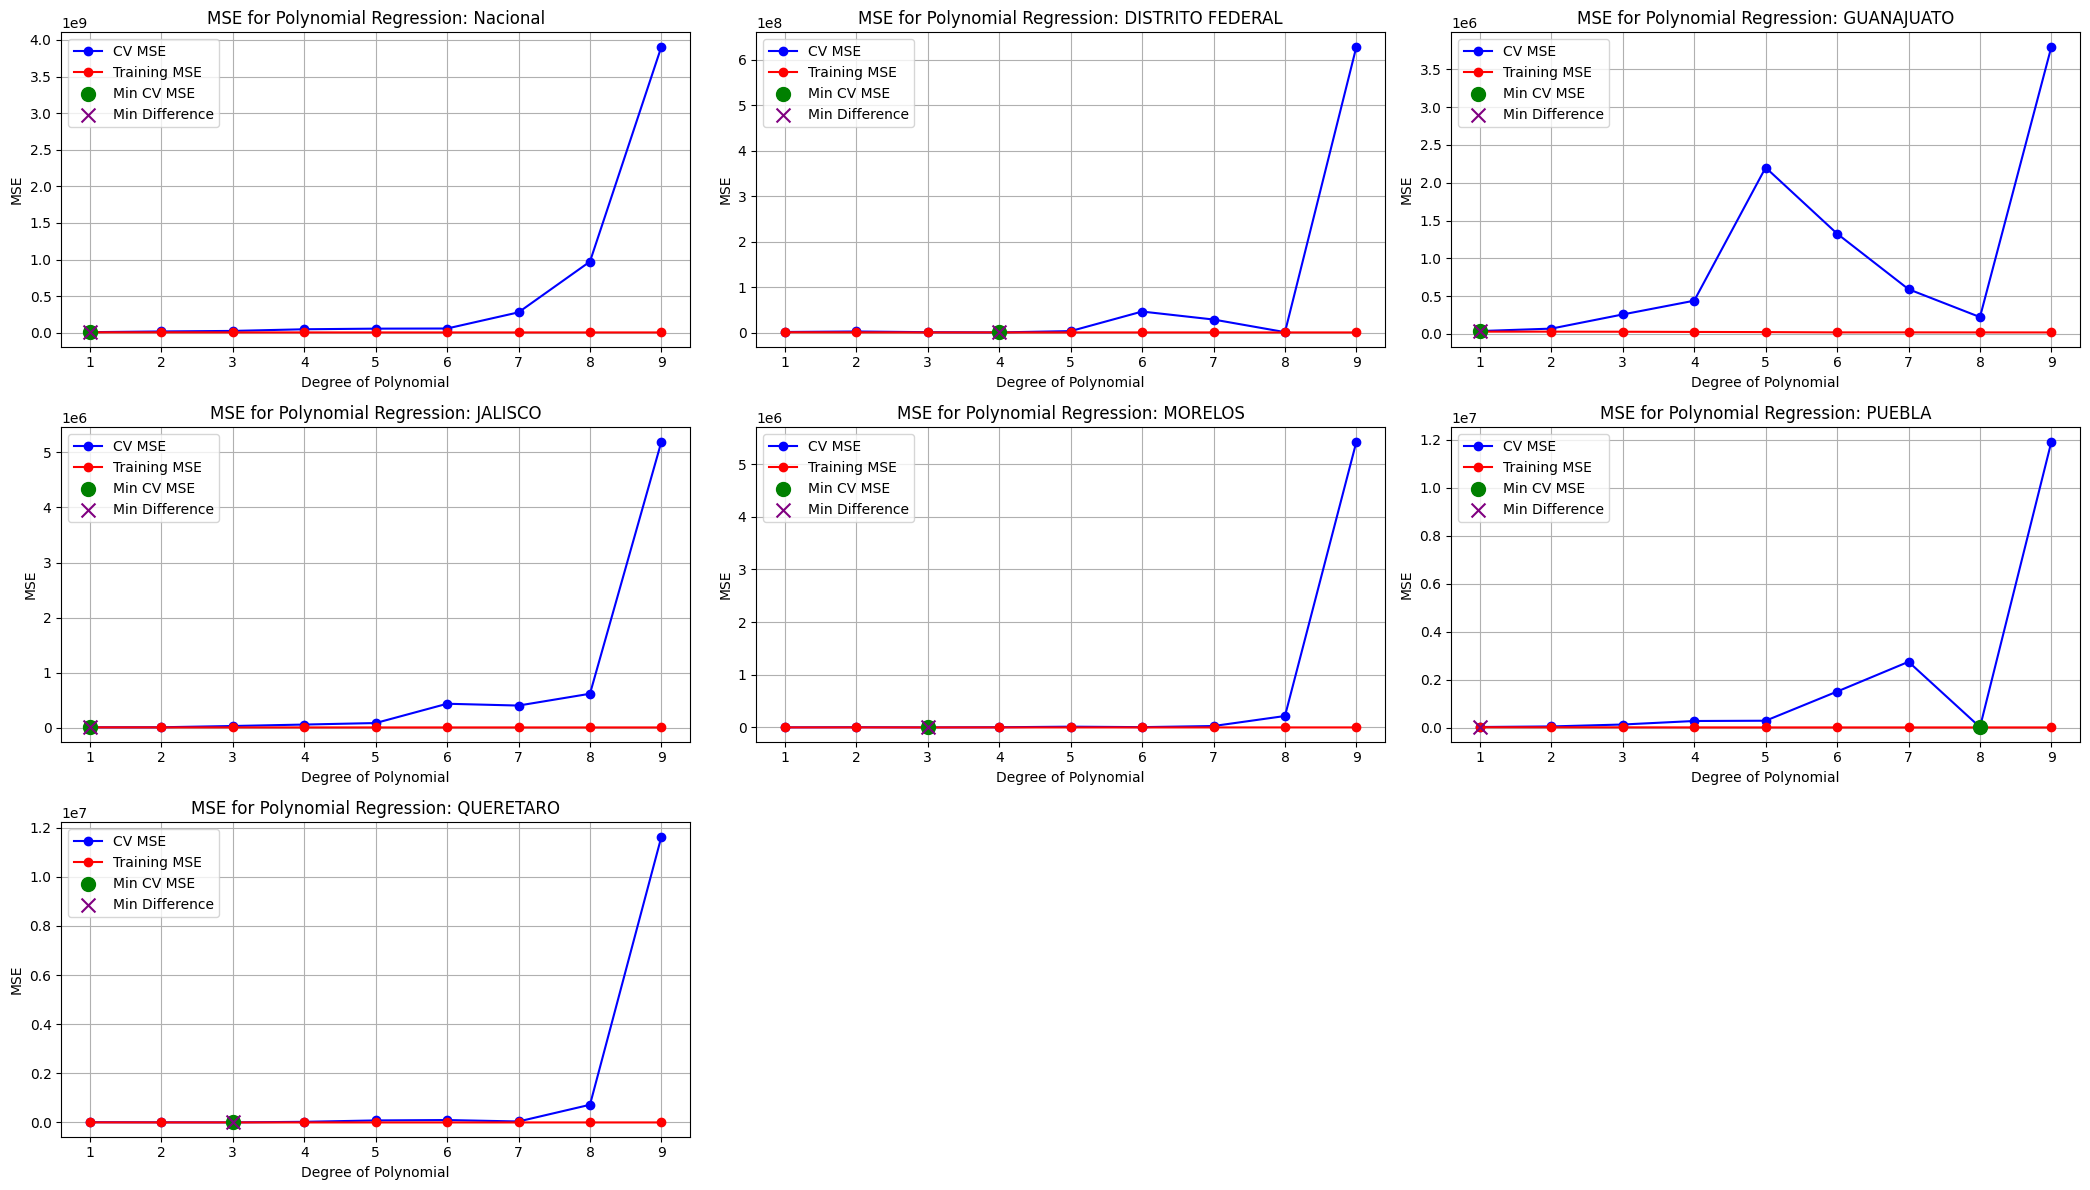

Nacional: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
DISTRITO FEDERAL: Optimal by difference = Degree 4, Optimal by CV MSE = Degree 4
GUANAJUATO: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
JALISCO: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 1
MORELOS: Optimal by difference = Degree 3, Optimal by CV MSE = Degree 3
PUEBLA: Optimal by difference = Degree 1, Optimal by CV MSE = Degree 8
QUERETARO: Optimal by difference = Degree 3, Optimal by CV MSE = Degree 3


In [9]:
n_rows = (len(estados_a_filtrar) + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(21, 4 * n_rows))
axes = axes.flatten()

degrees = range(1, 10)

optimal_degrees_difference = []
optimal_degrees_cv_min = []

for ax, estado in zip(axes, estados_a_filtrar):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]
    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    x = np.array(range(len(df_daily))).reshape(-1, 1)
    y = df_daily.values.reshape(-1, 1)

    cv_scores = []
    mse_scores = []

    for degree in degrees:
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        scores = cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=5)
        cv_scores.append(-scores.mean())
        model.fit(x, y)
        y_pred = model.predict(x)
        mse_scores.append(mean_squared_error(y, y_pred))

    mse_differences = np.abs(np.array(mse_scores) - np.array(cv_scores))
    min_difference_index = np.argmin(mse_differences)
    min_cv_mse_index = np.argmin(cv_scores)
    
    optimal_degrees_difference.append(degrees[min_difference_index])
    optimal_degrees_cv_min.append(degrees[min_cv_mse_index])

    ax.plot(degrees, cv_scores, label='CV MSE', marker='o', color='blue')
    ax.plot(degrees, mse_scores, label='Training MSE', marker='o', color='red')
    ax.scatter([degrees[min_cv_mse_index]], [cv_scores[min_cv_mse_index]], color='green', s=100, label='Min CV MSE', zorder=5, marker='o')
    ax.set_title(f'MSE for Polynomial Regression: {estado}')
    ax.scatter([degrees[min_difference_index]], [cv_scores[min_difference_index]], color='purple', s=100, label='Min Difference', zorder=5, marker='x')
    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylabel('MSE')
    ax.legend()
    ax.grid(True)

for i in range(len(estados_a_filtrar), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

for estado, min_diff_deg, min_cv_deg in zip(estados_a_filtrar, optimal_degrees_difference, optimal_degrees_cv_min):
    print(f"{estado}: Optimal by difference = Degree {min_diff_deg}, Optimal by CV MSE = Degree {min_cv_deg}")


In [10]:
optimal_degrees_summary = []

for estado, min_diff_deg, min_cv_deg in zip(estados_a_filtrar, optimal_degrees_difference, optimal_degrees_cv_min):
    if min_diff_deg == min_cv_deg:
        result = print(f"{estado}: El grado de polinomio óptimo es {min_diff_deg}")
        optimal_degrees_summary.append(min_diff_deg)
    else:
        result = print(f"{estado}: Hay dos posibilidades para el grado de polinomio óptimo, {min_diff_deg} y {min_cv_deg}")
        optimal_degrees_summary.append(min_cv_deg)

# Con algunas pruebas y a base de obseraciones, se anotaron los grados de polinomio óptimos para cada estado utilizando como referencia el valor de R2 y la similitud entre la regresión y los datos reales.
# optimal_degrees_summary = [5,4,5,3,3,8,3]

Nacional: El grado de polinomio óptimo es 1
DISTRITO FEDERAL: El grado de polinomio óptimo es 4
GUANAJUATO: El grado de polinomio óptimo es 1
JALISCO: El grado de polinomio óptimo es 1
MORELOS: El grado de polinomio óptimo es 3
PUEBLA: Hay dos posibilidades para el grado de polinomio óptimo, 1 y 8
QUERETARO: El grado de polinomio óptimo es 3


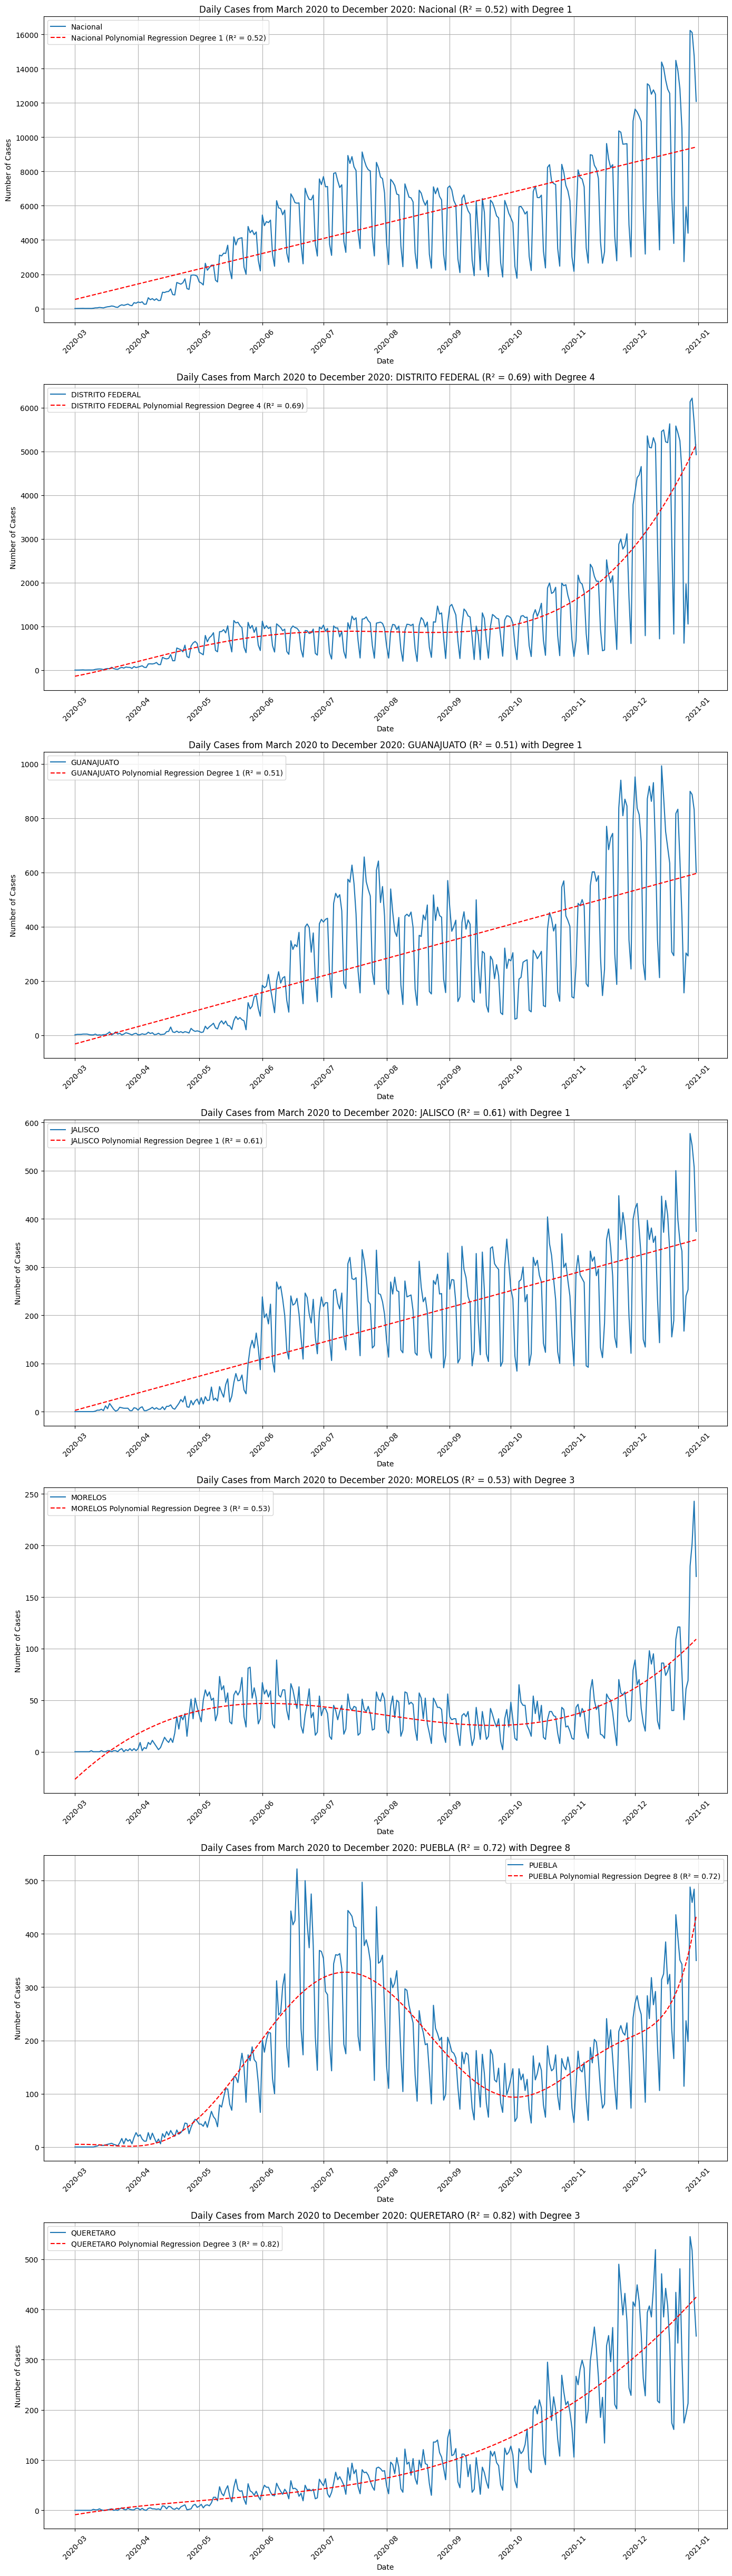

In [11]:
import pandas as pd
from matplotlib import pyplot as plt

df_linealizado = pd.DataFrame()

fig, axes = plt.subplots(len(estados_a_filtrar), 1, figsize=(14, 7 * len(estados_a_filtrar)))
rs = []

if len(estados_a_filtrar) == 1:
    axes = [axes]

for ax, estado, degree in zip(axes, estados_a_filtrar, optimal_degrees_summary):
    df_estado = df_filtrado[df_filtrado['nombre'] == estado]

    df_transposed = df_estado.set_index(['cve_ent', 'poblacion', 'nombre']).T
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'date'}, inplace=True)
    df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

    df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]
    df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
    df_daily = df_filtered_numeric.sum(axis=1)

    x = np.array(range(len(df_daily))).reshape(-1, 1)
    y = df_daily.values.reshape(-1, 1)

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
    y_pred = model.predict(x)

    r_squared = r2_score(y, y_pred)

    ax.plot(df_filtered['date'], df_daily, linestyle='-', label=f'{estado}')
    ax.plot(df_filtered['date'], y_pred, linestyle='--', color='red', label=f'{estado} Polynomial Regression Degree {degree} (R² = {r_squared:.2f})')
    rs.append(r_squared)
    ax.set_title(f'Daily Cases from March 2020 to December 2020: {estado}' + f' (R² = {r_squared:.2f}) with Degree {degree}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Cases')
    ax.grid(True)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

    df_linealizado_temp = pd.DataFrame({
        'date': df_filtered['date'],
        'estado': estado,
        'predicted_cases': y_pred.flatten()
    })
    df_linealizado = pd.concat([df_linealizado, df_linealizado_temp], ignore_index=True)

plt.tight_layout()
plt.show()


In [12]:
print("R cuadrado para cada estado bajo primer criterio de selección de grado de polinomio óptimo:")

for estado, r in zip(estados_a_filtrar, rs):
    print(f"{estado}: {r}")

R cuadrado para cada estado bajo primer criterio de selección de grado de polinomio óptimo:
Nacional: 0.5248952666587468
DISTRITO FEDERAL: 0.6914540254793149
GUANAJUATO: 0.5149200028078145
JALISCO: 0.6086216280636757
MORELOS: 0.526698442478315
PUEBLA: 0.721501640986312
QUERETARO: 0.8165992198161128


In [13]:

# optimal_degrees_summary = [5,4,5,3,3,8,3]
print("R cuadrado para cada estado bajo segundo criterio de selección de grado de polinomio óptimo:")

for estado, r in zip(estados_a_filtrar, rs):
    print(f"Polinomio de grado {optimal_degrees_summary[estados_a_filtrar.index(estado)]} para {estado}: {r}")

R cuadrado para cada estado bajo segundo criterio de selección de grado de polinomio óptimo:
Polinomio de grado 1 para Nacional: 0.5248952666587468
Polinomio de grado 4 para DISTRITO FEDERAL: 0.6914540254793149
Polinomio de grado 1 para GUANAJUATO: 0.5149200028078145
Polinomio de grado 1 para JALISCO: 0.6086216280636757
Polinomio de grado 3 para MORELOS: 0.526698442478315
Polinomio de grado 8 para PUEBLA: 0.721501640986312
Polinomio de grado 3 para QUERETARO: 0.8165992198161128


In [14]:
df_transposed = df_filtrado.set_index(['cve_ent', 'poblacion', 'nombre']).T
df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'date'}, inplace=True)
df_transposed['date'] = pd.to_datetime(df_transposed['date'], format='%d-%m-%Y')

df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

print(df_filtered.head())

cve_ent         date                9         11      14      17      21  \
poblacion                     9018645    6228175 8409693 2044058 6604451   
nombre               DISTRITO FEDERAL GUANAJUATO JALISCO MORELOS  PUEBLA   
4         2020-03-01                0          1       0       0       0   
5         2020-03-02                0          3       0       0       0   
6         2020-03-03                1          3       0       0       0   
7         2020-03-04                3          3       0       0       0   
8         2020-03-05                5          4       0       0       0   

cve_ent          22         0  
poblacion   2279637 127792286  
nombre    QUERETARO  Nacional  
4                 0         2  
5                 0         5  
6                 0         9  
7                 0        10  
8                 0        11  


In [15]:
df_linealizado = df_linealizado.pivot(index='date', columns='estado', values='predicted_cases')

print(df_linealizado)

estado      DISTRITO FEDERAL  GUANAJUATO     JALISCO     MORELOS     Nacional  \
date                                                                            
2020-03-01       -139.902919  -32.209555    2.602712  -26.770849   531.768070   
2020-03-02       -130.811272  -30.149679    3.763230  -24.946103   560.915160   
2020-03-03       -121.531789  -28.089802    4.923748  -23.149564   590.062250   
2020-03-04       -112.071851  -26.029926    6.084266  -21.381044   619.209341   
2020-03-05       -102.438759  -23.970050    7.244784  -19.640352   648.356431   
...                      ...         ...         ...         ...          ...   
2020-12-27       4770.791298  587.813187  351.918615  101.443606  9305.042262   
2020-12-28       4864.345822  589.873063  353.079133  103.331770  9334.189352   
2020-12-29       4959.490371  591.932940  354.239650  105.248752  9363.336442   
2020-12-30       5056.241723  593.992816  355.400168  107.194742  9392.483533   
2020-12-31       5154.616738

   Component  Explained Variance (%) Most Represented State
0          1            7.757532e+01       DISTRITO FEDERAL
1          2            1.394793e+01                 PUEBLA
2          3            6.893720e+00                MORELOS
3          4            1.544953e+00                MORELOS
4          5            3.807320e-02              QUERETARO
5          6            6.493578e-31                JALISCO


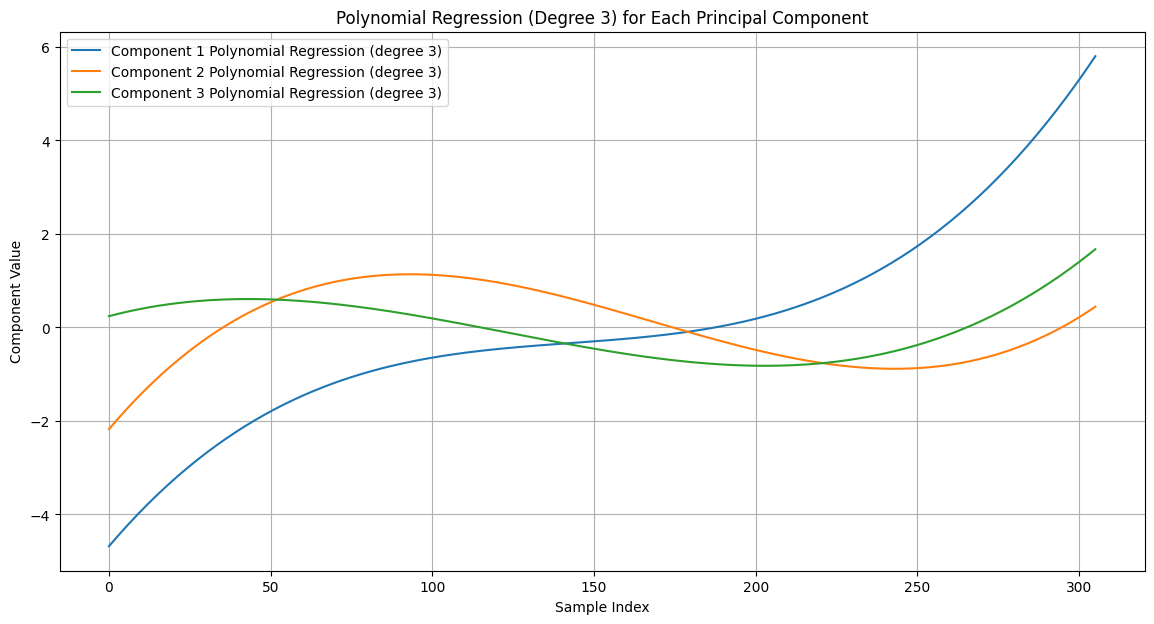

In [16]:
df_states = df_linealizado.drop(columns=[col for col in df_linealizado.columns if 'Nacional' in col])

scaler = StandardScaler()
df_filtrado_scaled = scaler.fit_transform(df_states)

pca = PCA()
principalComponents = pca.fit_transform(df_filtrado_scaled)

components_df = pd.DataFrame(pca.components_, columns=df_states.columns)

explained_variance = pca.explained_variance_ratio_

most_represented_state = components_df.abs().idxmax(axis=1)

summary_df = pd.DataFrame({
    'Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance (%)': explained_variance * 100,
    'Most Represented State': most_represented_state
})

print(summary_df)

plt.figure(figsize=(14, 7))

for i in range(3):
    X_component = np.arange(len(principalComponents))[:, np.newaxis]
    y_component = principalComponents[:, i]

    polynomial_features = PolynomialFeatures(degree=3)
    X_poly = polynomial_features.fit_transform(X_component)
    model = LinearRegression()
    model.fit(X_poly, y_component)
    y_poly_pred = model.predict(X_poly)

    plt.plot(X_component, y_poly_pred, label=f'Component {i+1} Polynomial Regression (degree 3)')

plt.title('Polynomial Regression (Degree 3) for Each Principal Component')
plt.xlabel('Sample Index')
plt.ylabel('Component Value')
plt.legend()
plt.grid(True)
plt.show()

   Component  Explained Variance (%) Most Represented State
0          1            7.757532e+01       DISTRITO FEDERAL
1          2            1.394793e+01                 PUEBLA
2          3            6.893720e+00                MORELOS
3          4            1.544953e+00                MORELOS
4          5            3.807320e-02              QUERETARO
5          6            6.493578e-31                JALISCO


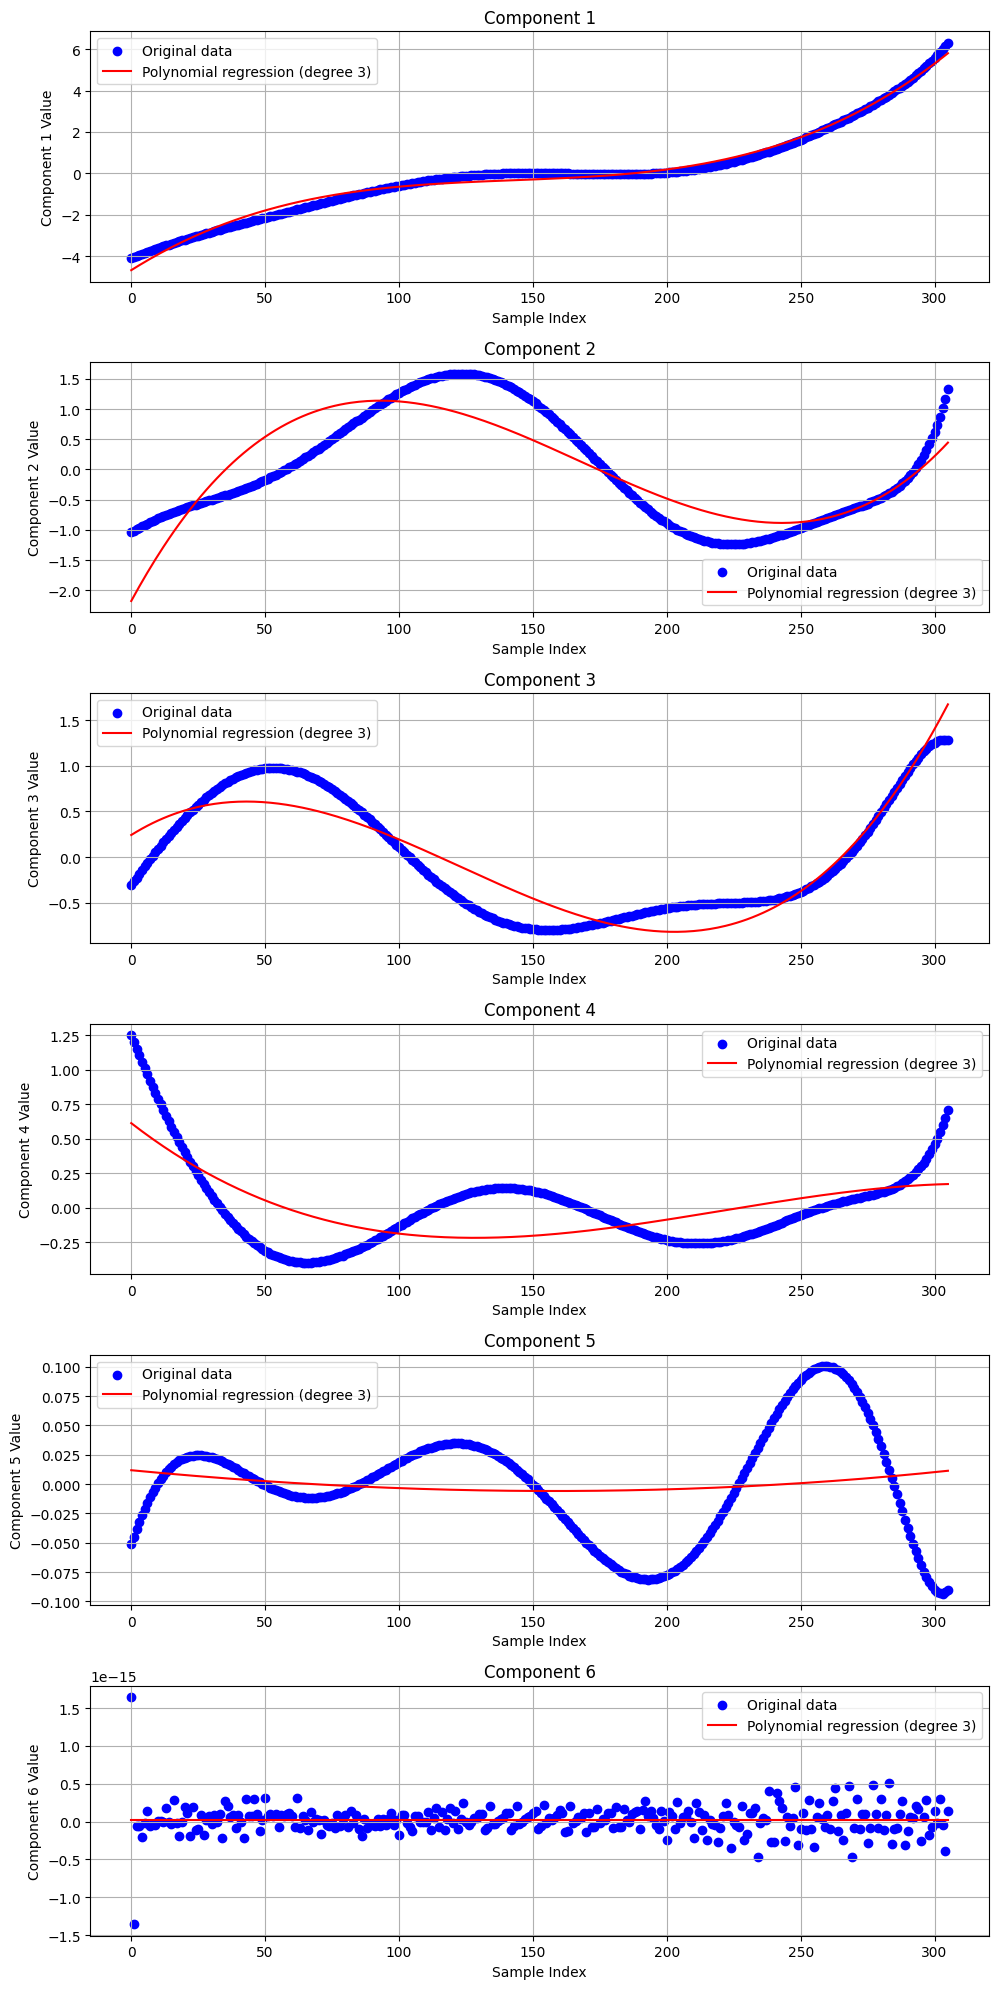

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df_states = df_states.drop(columns=[col for col in df_states.columns if 'Nacional' in col])

scaler = StandardScaler()
df_filtrado_scaled = scaler.fit_transform(df_states)

pca = PCA()
principalComponents = pca.fit_transform(df_filtrado_scaled)

components_df = pd.DataFrame(pca.components_, columns=df_states.columns)

explained_variance = pca.explained_variance_ratio_

most_represented_state = components_df.abs().idxmax(axis=1)

summary_df = pd.DataFrame({
    'Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance (%)': explained_variance * 100,
    'Most Represented State': most_represented_state
})

print(summary_df)

fig, axs = plt.subplots(nrows=len(principalComponents[0]), figsize=(10, 20))

for i in range(len(principalComponents[0])):
    X_component = np.arange(len(principalComponents))[:, np.newaxis]
    y_component = principalComponents[:, i]

    polynomial_features = PolynomialFeatures(degree=3)
    X_poly = polynomial_features.fit_transform(X_component)
    model = LinearRegression()
    model.fit(X_poly, y_component)
    y_poly_pred = model.predict(X_poly)

    axs[i].scatter(X_component, y_component, color='blue', label='Original data')
    axs[i].plot(X_component, y_poly_pred, color='red', label='Polynomial regression (degree 3)')
    axs[i].set_title(f'Component {i+1}')
    axs[i].set_xlabel('Sample Index')
    axs[i].set_ylabel(f'Component {i+1} Value')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

   Component  Explained Variance (%) Most Represented State
0          1            7.757532e+01       DISTRITO FEDERAL
1          2            1.394793e+01                 PUEBLA
2          3            6.893720e+00                MORELOS
3          4            1.544953e+00                MORELOS
4          5            3.807320e-02              QUERETARO
5          6            6.493578e-31                JALISCO


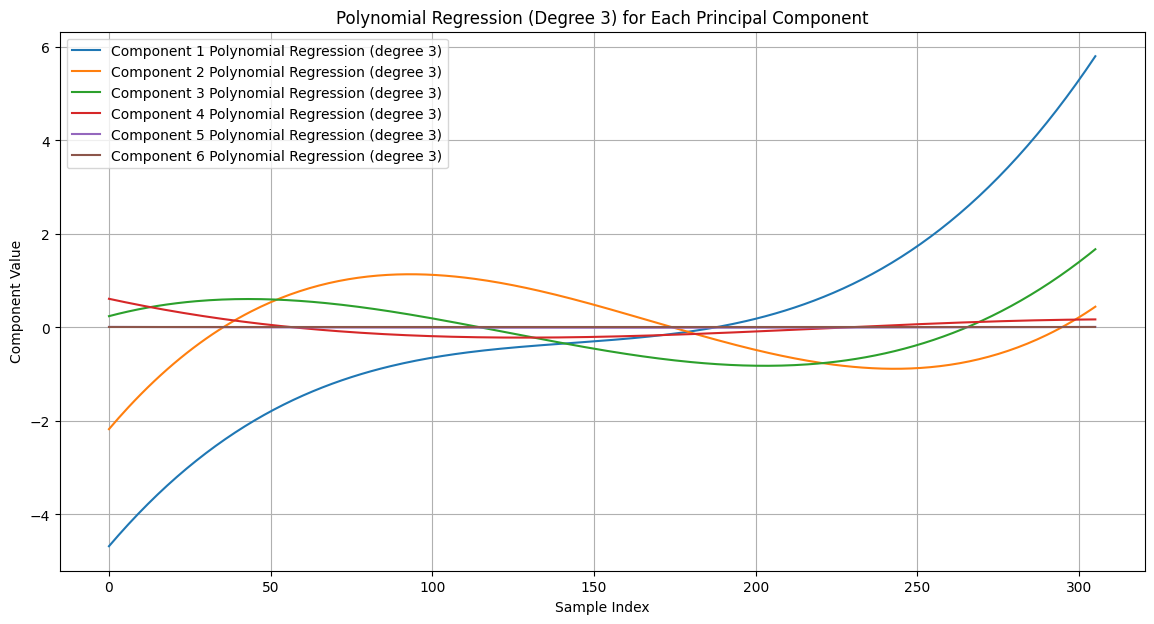

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

df_states = df_states.drop(columns=[col for col in df_states.columns if 'Nacional' in col])

scaler = StandardScaler()
df_filtrado_scaled = scaler.fit_transform(df_states)

pca = PCA()
principalComponents = pca.fit_transform(df_filtrado_scaled)

components_df = pd.DataFrame(pca.components_, columns=df_states.columns)

explained_variance = pca.explained_variance_ratio_

most_represented_state = components_df.abs().idxmax(axis=1)

summary_df = pd.DataFrame({
    'Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance (%)': explained_variance * 100,
    'Most Represented State': most_represented_state
})

print(summary_df)

plt.figure(figsize=(14, 7))

for i in range(len(principalComponents[0])):
    X_component = np.arange(len(principalComponents))[:, np.newaxis]
    y_component = principalComponents[:, i]

    polynomial_features = PolynomialFeatures(degree=3)
    X_poly = polynomial_features.fit_transform(X_component)
    model = LinearRegression()
    model.fit(X_poly, y_component)
    y_poly_pred = model.predict(X_poly)

    plt.plot(X_component, y_poly_pred, label=f'Component {i+1} Polynomial Regression (degree 3)')

plt.title('Polynomial Regression (Degree 3) for Each Principal Component')
plt.xlabel('Sample Index')
plt.ylabel('Component Value')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
data = df_linealizado
data['date'] = data.index
X = data.drop(['Nacional', 'date'], axis=1)
y = data['Nacional']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

model = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Best Decision Tree Regressor - MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print(f'Cross-Validation RMSE: {cv_rmse_scores.mean()}')

print("R2 Score:", best_model.score(X_test, y_test))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Regressor - MSE: 1037.116497056087, MAE: 31.039758543164456, RMSE: 32.20429314635064
Cross-Validation RMSE: 1469.3404622414212
R2 Score: 0.9998483717433809


Best Decision Tree Regressor - MSE: 2666.908588150418, MAE: 43.456622009519094, RMSE: 51.642120291002946
Decision Tree R2 Score: 0.9995870570399267


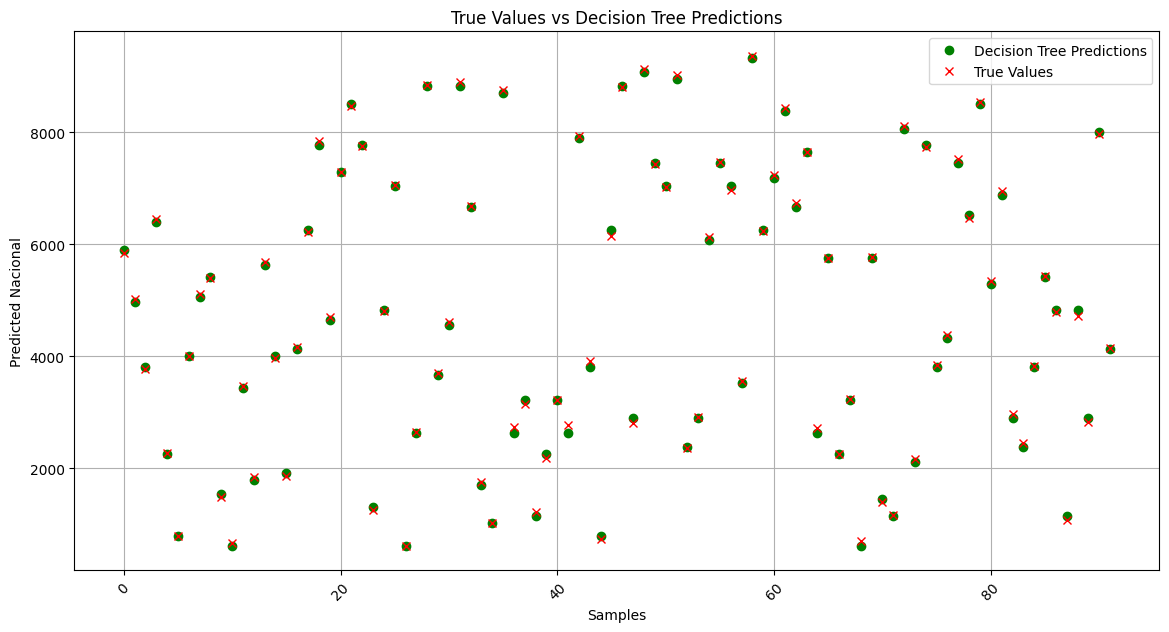

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data.drop(columns=['Nacional'])
y = data['Nacional']
X['date'] = data['date']

X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['date']), y, test_size=0.3, random_state=42)

dates_train = X.loc[X_train.index, 'date']
dates_test = X.loc[X_test.index, 'date']

tree_model = DecisionTreeRegressor(random_state=42)
param_grid_tree = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
print(f'Best Decision Tree Regressor - MSE: {mse_tree}, MAE: {mae_tree}, RMSE: {rmse_tree}')
print("Decision Tree R2 Score:", best_tree_model.score(X_test, y_test))

plt.figure(figsize=(14, 7))

dates = dates_test if 'date' in X_test.columns else np.arange(len(y_test))
plt.plot(dates, y_pred_tree, label='Decision Tree Predictions', linestyle='', marker='o', color='green')
plt.plot(dates, y_test.values, label='True Values', linestyle='', marker='x', color='red')
plt.title('True Values vs Decision Tree Predictions')
plt.xlabel('Date' if 'date' in X_test.columns else 'Samples')
plt.ylabel('Predicted Nacional')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45) 
plt.show()

/var/folders/73/m50h3qv91_n45vnh3sfw1pb00000gq/T/ipykernel_26505/2614344850.py:33: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_transposed['date'] = pd.to_datetime(df_transposed['date'])


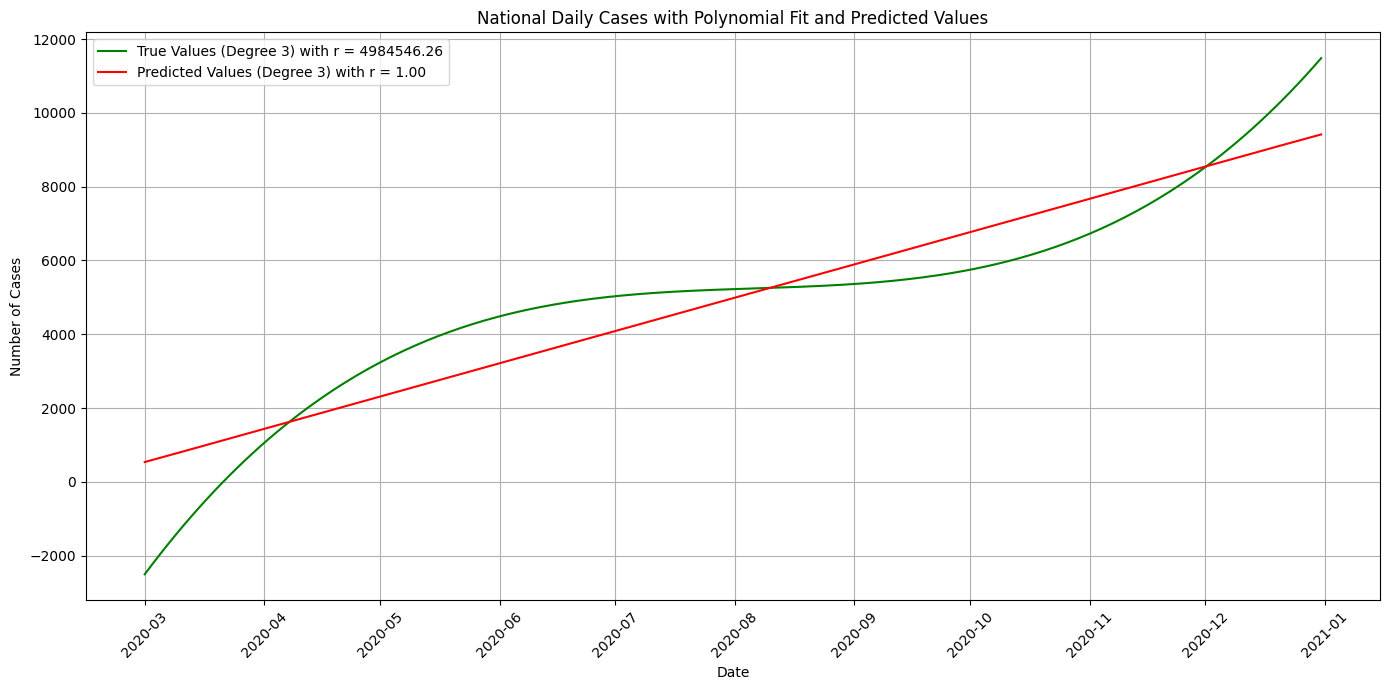

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

X = data.drop(columns=['Nacional'])
y = data['Nacional']
X['date'] = data['date']

tree_model = DecisionTreeRegressor(random_state=42)
param_grid_tree = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_tree.fit(X.drop(columns=['date']), y)
best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X.drop(columns=['date']))

predictions_df = pd.DataFrame({
    'date': X['date'],
    'true_values': y,
    'predicted_values': y_pred_tree
})

df_nacional = df_filtrado[df_filtrado['nombre'] == 'Nacional']

df_transposed = df_nacional.set_index(['cve_ent', 'poblacion', 'nombre']).T
df_transposed.reset_index(inplace=True)
df_transposed.rename(columns={'index': 'date'}, inplace=True)
df_transposed['date'] = pd.to_datetime(df_transposed['date'])

df_filtered = df_transposed[(df_transposed['date'] >= '2020-03-01') & (df_transposed['date'] <= '2020-12-31')]

df_filtered_numeric = df_filtered.select_dtypes(include=['number'])
df_daily = df_filtered_numeric.sum(axis=1)

x_true = np.arange(len(df_daily))
y_true = df_daily.values
p_true = np.polyfit(x_true, y_true, 3)
poly_true = np.poly1d(p_true)

x_pred = np.arange(len(predictions_df)) 
y_pred = predictions_df['predicted_values'].values
p_pred = np.polyfit(x_pred, y_pred, 9)
poly_pred = np.poly1d(p_pred)

plt.figure(figsize=(14, 7))
plt.plot(df_filtered['date'], poly_true(x_true), linestyle='-', color='green', label=f'True Values (Degree 3) with r = {mean_squared_error(y_true, poly_true(x_true)):.2f}')
plt.plot(predictions_df['date'], poly_pred(x_pred), linestyle='-', color='red', label=f'Predicted Values (Degree 3) with r = {r2_score(y, y_pred_tree):.2f}')
plt.title('National Daily Cases with Polynomial Fit and Predicted Values')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()